# Apartment Price Prediction using Regression

### This notebook performs linear regression on a dataset of apartments to predict their prices based on various features. 

<hr>

### Import Needed libraries

In [197]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

### Load the data from a CSV file

In [198]:
df = pd.read_csv('Apartment_INFO.csv')
df.head()

,Area,Build_date,Room,Parking,Warehouse,Elevator,Price,Address
0,95,1402,2,1,1,1,10450000000,سازمان آب
1,183,1401,3,1,1,1,21700000000,ظفر
2,114,1391,2,1,1,1,12540000000,سازمان آبخیابان شربیانی (خ. نیلوفر)
3,145,1392,3,1,1,1,15000000000,پونک
4,63,1402,1,1,0,1,4070000000,دیلمان


### Print the shape of the original DataFrame

In [199]:
print('Original shape:', df.shape)

Original shape: (1130, 8)


### Drop duplicates from the DataFrame

In [200]:
df.drop_duplicates(inplace=True)
print('shape:', df.shape)

shape: (1071, 8)


### Remove rows where the 'Price' column is empty or missing from the DataFrame

In [201]:
df = df.dropna(subset=['Price'])
print('shape:', df.shape)

shape: (1071, 8)


### Remove rows where the 'Address' column is empty or missing from the DataFrame

In [202]:
df = df.dropna(subset=['Address'])
print('shape:', df.shape)

shape: (1071, 8)


### Remove rows with zero prices or addresses from the DataFrame

In [203]:
df = df[(df['Price'] != 0) & (df['Address'] != 0)]
print('shape:', df.shape)

shape: (1067, 8)


### Encode the address variable using LabelEncoder

In [204]:
label_encoder = LabelEncoder()
df['Address'] = label_encoder.fit_transform(df['Address'])

### Create a dictionary to map encoded addresses back to their original values

In [205]:
address_dict = {i: val for i, val in enumerate(label_encoder.classes_)}

### Plot a scatter plot of price vs. area for visualization

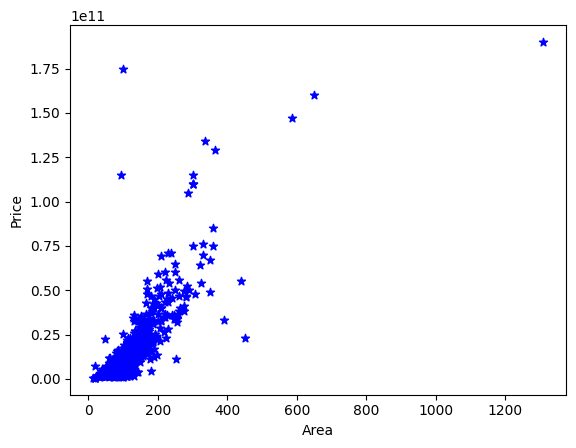

In [206]:
plt.scatter(df['Area'], df['Price'], color='blue', marker='*')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

### Visualization of apartment features and their impact on price

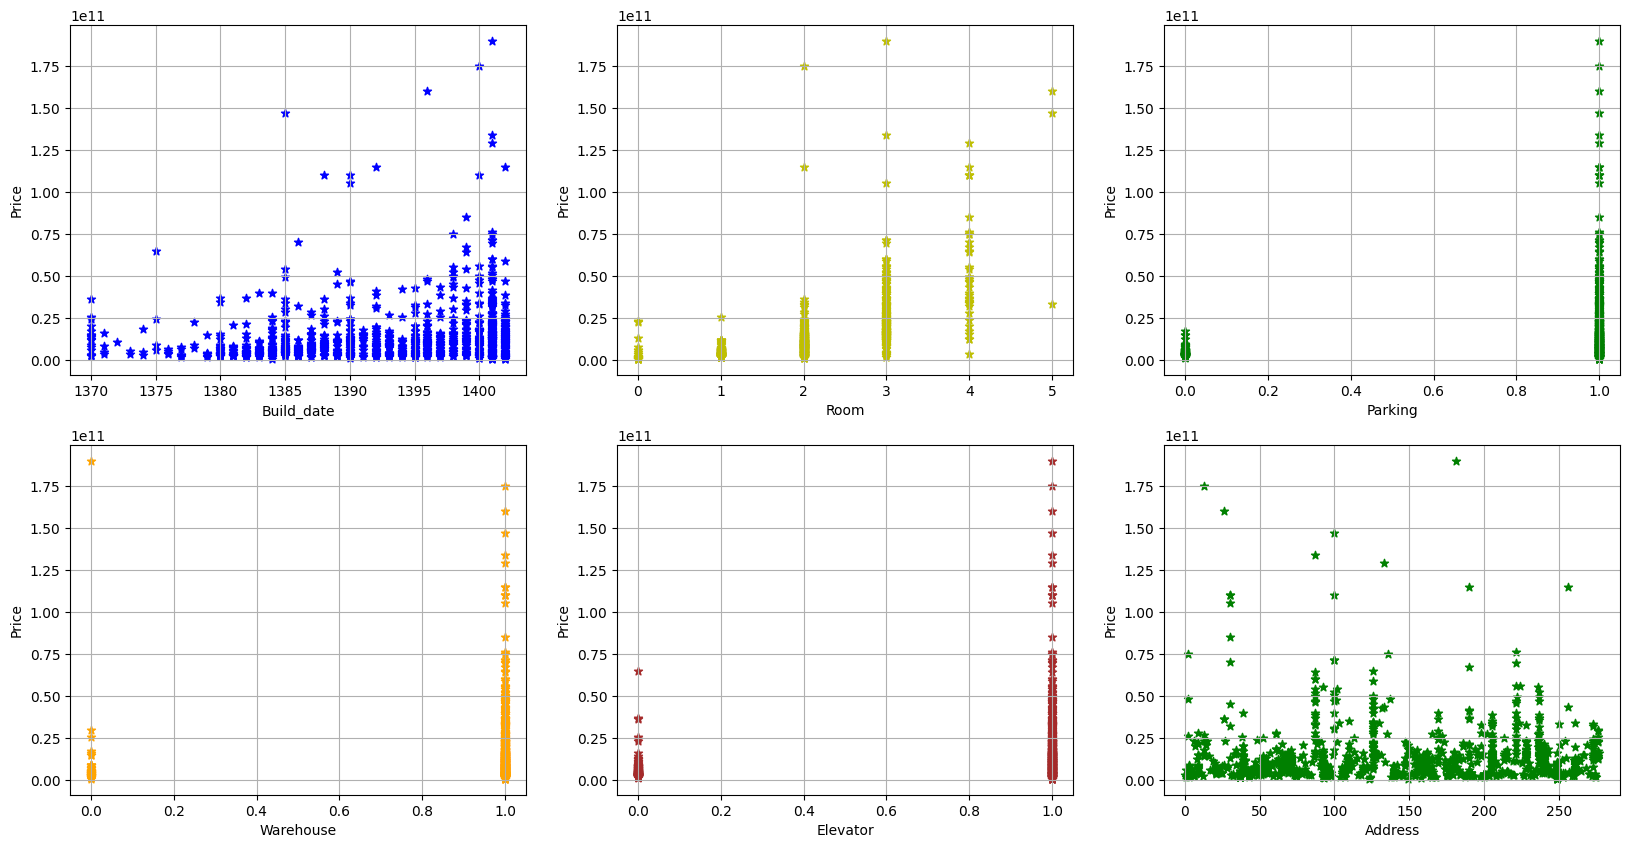

In [207]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.scatter(df['Build_date'], df['Price'], color='blue', marker='*')
plt.xlabel('Build_date')
plt.ylabel('Price')
plt.grid()

plt.subplot(2, 3, 2)
plt.scatter(df['Room'], df['Price'], c='y', marker='*')
plt.xlabel('Room')
plt.ylabel('Price')
plt.grid()

plt.subplot(2, 3, 3)
plt.scatter(df['Parking'], df['Price'], color='g', marker='*')
plt.xlabel('Parking')
plt.ylabel('Price')
plt.grid()

plt.subplot(2, 3, 4)
plt.scatter(df['Warehouse'], df['Price'], color='orange', marker='*')
plt.xlabel('Warehouse')
plt.ylabel('Price')
plt.grid()

plt.subplot(2, 3, 5)
plt.scatter(df['Elevator'], df['Price'], color='brown', marker='*')
plt.xlabel('Elevator')
plt.ylabel('Price')
plt.grid()

plt.subplot(2, 3, 6)
plt.scatter(df['Address'], df['Price'], color='green', marker='*')
plt.xlabel('Address')
plt.ylabel('Price')
plt.grid()

plt.show()


### Split the data into training and testing sets

In [208]:
msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]

### Fit a linear regression model on the training set

In [209]:
regr = LinearRegression()
x_train = train_df[['Area','Build_date','Room','Parking','Warehouse','Elevator','Address']].values
y_train = train_df['Price'].values
regr.fit(x_train, y_train)

LinearRegression()

### Print the coefficients of the trained model

In [210]:
print("Model coefficients:", regr.coef_)

Model coefficients: [ 1.98507614e+08  3.05508017e+07  1.09609294e+09 -5.20910282e+08
  1.78878824e+09  9.21173894e+07 -5.08251180e+06]


### Evaluate the performance of the model on the testing set

In [211]:
x_test = test_df[['Area','Build_date','Room','Parking','Warehouse','Elevator','Address']].values
y_test = test_df['Price'].values
y_pred = regr.predict(x_test)
mse = np.mean((y_pred - y_test) ** 2)
r2 = regr.score(x_test, y_test)
print("Mean squared error:", mse)
print("R-squared score:", r2)

Mean squared error: 5.272857238869854e+19
R-squared score: 0.7263026761698748


### Make a prediction for a new input using the trained model

In [212]:
# Note:
# input = [[Area, Buil_ddate, Room, Parking, Warehouse, Elevator, Address]]
new_input = [[90, 1400, 2, 1, 1, 1, label_encoder.transform(['پونک'])[0]]]
prediction = regr.predict(new_input)
print("Predicted price for new input:", prediction[0])

Predicted price for new input: 9647281667.842812
